### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
df = pd.read_csv('D:/Projects/Python/Suicides Data Analysis/master.csv')

df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


#### Checking for data types and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.describe(include= 'object')

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


In [6]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# There is no use of country-year column in data. So we can drop this column

df.drop('country-year', axis = 1, inplace = True)

In [8]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [9]:
# There are lots of null values in HDI FOR YEAR column, we can not manage that much null values. So dropping the column

df.drop('HDI for year', axis = 1, inplace = True)

df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [11]:
df.rename(columns = {' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace = True)

In [12]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [13]:
type(df['gdp_for_year ($)'][0])

str

In [14]:
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype('int64')

In [15]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


### Analysing the Data

#### Checking for suicide numbers for country-wise

In [16]:
country_suicide = df.groupby(['country'], as_index=  False)['suicides_no'].sum().sort_values(by = 'suicides_no', ascending = False).head(15)
country_suicide

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


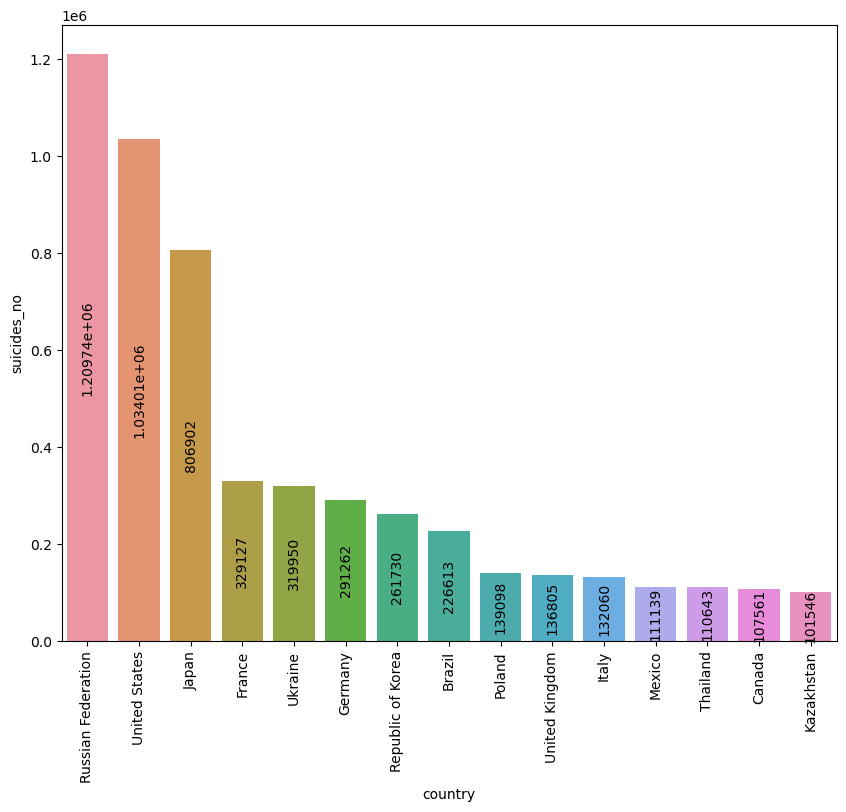

In [17]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = country_suicide, x = 'country', y = 'suicides_no')
ax.bar_label(ax.containers[0], rotation = 'vertical',label_type = 'center')
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


#### checking the number of suicides for males and females

In [19]:
gender_suicides = df.groupby('sex')['suicides_no'].sum()
gender_suicides

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

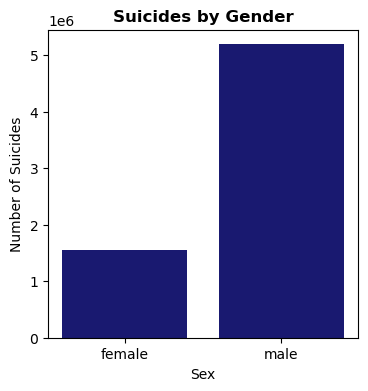

In [20]:
plt.figure(figsize = (4,4))
plt.bar(x = gender_suicides.index, height = gender_suicides.values, color = 'midnightblue')
plt.xlabel('Sex')
plt.ylabel('Number of Suicides')
plt.title('Suicides by Gender', weight = 'bold')
plt.show()

In [21]:
sex_country_suicide = df.groupby(['country','sex'], as_index = False)['suicides_no'].sum().sort_values(by = 'suicides_no', ascending = False).head(10)
sex_country_suicide

,country,sex,suicides_no
151,Russian Federation,male,995412
197,United States,male,820216
93,Japan,male,555272
191,Ukraine,male,258573
92,Japan,female,251630
67,France,male,239708
150,Russian Federation,female,214330
196,United States,female,213797
71,Germany,male,211555
147,Republic of Korea,male,179115


#### No. of Suicides by year

In [22]:
year_suicides = df.groupby('year')['suicides_no'].sum().sort_values(ascending = False)
year_suicides

year
1999    256119
2002    256095
2003    256079
2000    255832
2001    250652
1998    249591
1996    246725
1995    243544
2009    243487
2004    240861
1997    240745
2010    238702
2011    236484
2008    235447
2005    234375
2007    233408
2006    233361
1994    232063
2012    230160
2013    223199
2014    222984
1993    221565
1992    211473
2015    203640
1991    198020
1990    193361
1989    160244
1987    126842
1988    121026
1986    120670
1985    116063
2016     15603
Name: suicides_no, dtype: int64

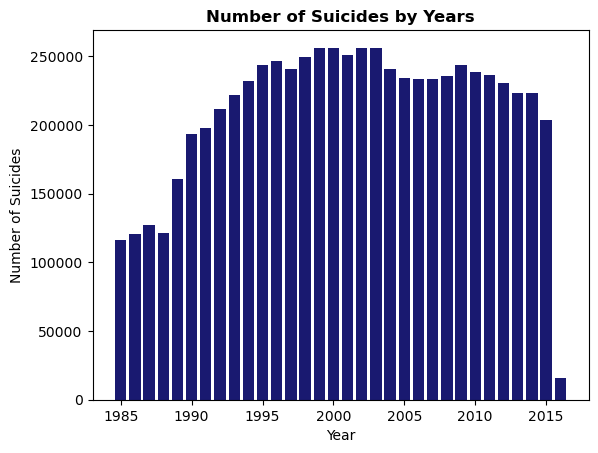

In [23]:
plt.bar(x = year_suicides.index, height = year_suicides.values, color = 'midnightblue')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Years', weight = 'bold')
plt.show()

#### Number of Suicides for Different Age Groups

In [24]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [25]:
age_group = df.groupby('age')['suicides_no'].sum()
age_group

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

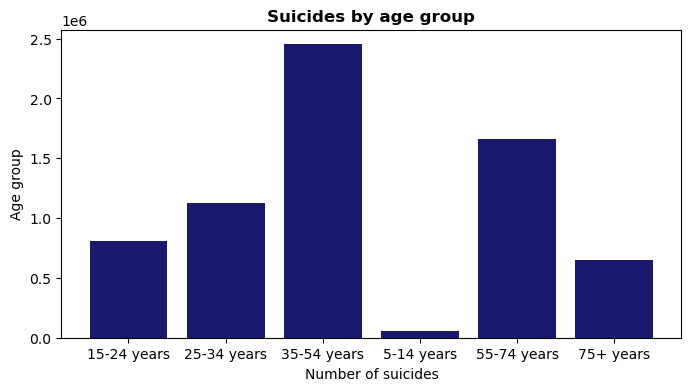

In [26]:
plt.figure(figsize = (8,4))
plt.bar(age_group.index, age_group.values, color = 'midnightblue')
plt.xlabel('Number of suicides')
plt.ylabel('Age group')
plt.title('Suicides by age group', weight = 'bold')
plt.show()

#### Different Generation's Data

In [27]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [28]:
gen_data = df.groupby('generation')['suicides_no'].sum()
gen_data

generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Silent             1781744
Name: suicides_no, dtype: int64

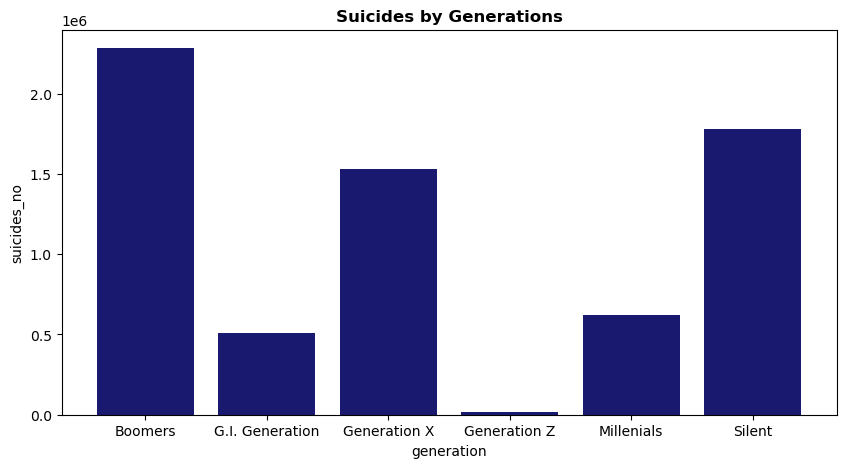

In [29]:
plt.figure(figsize= (10,5))
plt.bar(gen_data.index, gen_data.values, color = 'midnightblue')
plt.xlabel('generation')
plt.ylabel('suicides_no')
plt.title('Suicides by Generations', weight = 'bold')
plt.show()

In [30]:
population_by_country_year = df.groupby(['country', 'year'])['population'].sum().sort_values(ascending= False)
population_by_country_year


country                year
United States          2015    300078511
                       2014    297749735
                       2013    295322862
                       2012    292827128
                       2011    290313825
                                 ...    
Saint Kitts and Nevis  1990        39100
                       1992        39100
San Marino             2005        28264
                       2000        25369
                       1999        25192
Name: population, Length: 2321, dtype: int64

#### Looking for correlation between gdp and suicides number

In [31]:
gdp_suicides = df.groupby(['country', 'year']).agg({'suicides_no':'sum', 'gdp_for_year ($)':'mean'})

gdp_suicides.corr()

,suicides_no,gdp_for_year ($)
suicides_no,1.000000,0.657589
gdp_for_year ($),0.657589,1.000000
